In [2]:
import numpy as np
from math import sqrt

## Задание №5
Хомутов Евгений, БПМ-151
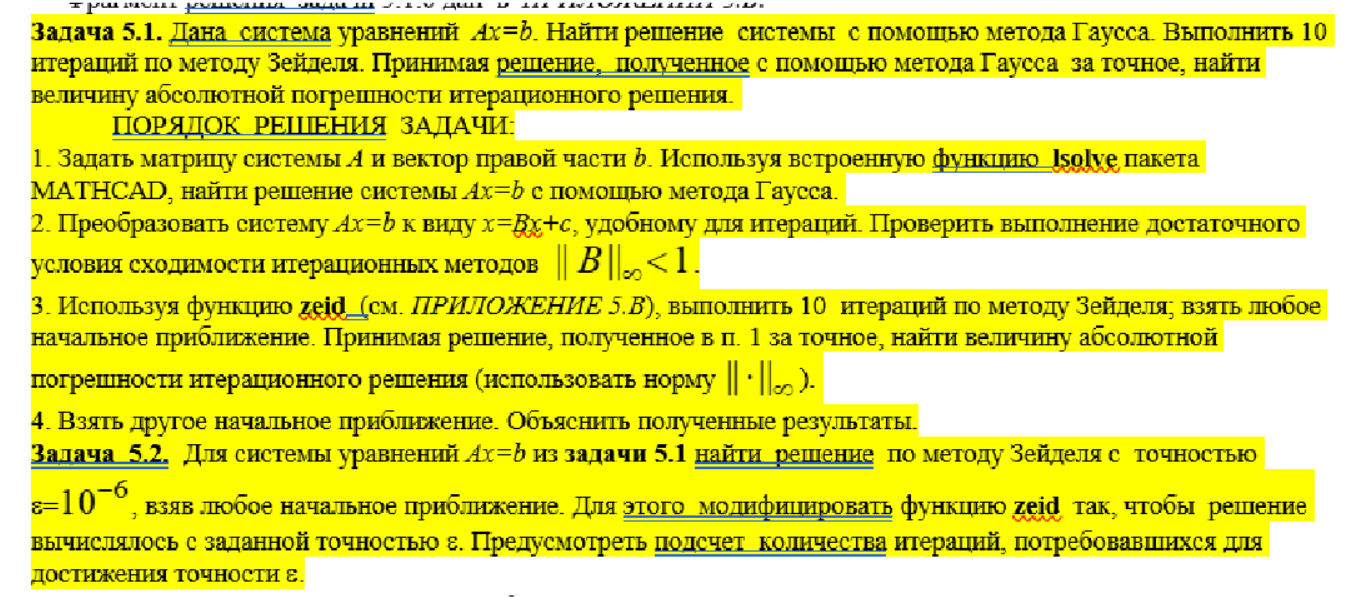

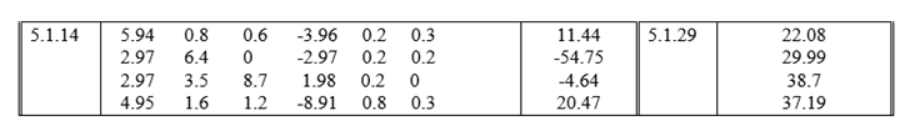

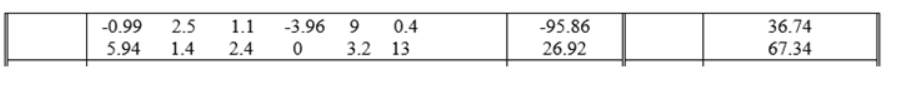

Исходные данные задачи:

In [3]:
epselon = 10**-6
A = np.array([[5.94, 0.8, 0.6, -3.96, 0.2, 0.3],
     [2.97, 6.4, 0, -2.97, 0.2, 0.2],
     [2.97, 3.5, 8.7, 1.98, 0.2, 0],
     [4.95, 1.6, 1.2, -8.91, 0.8, 0.3],
     [-0.99, 2.5, 1.1, -3.96, 9, 0.4],
     [5.94, 1.4, 2.4, 0, 3.2, 13]
    ])
b = np.array([[22.08],[29.99],[38.7],[37.19],[36.74],[67.34]])


Ответ встроенных функций языка:

In [4]:
ExactX = np.linalg.solve(A,b)
ExactX

array([[ 1.29292929],
       [ 2.9       ],
       [ 3.3       ],
       [-2.21212121],
       [ 1.9       ],
       [ 3.2       ]])

Определим метод Гаусса:

In [5]:
def GaussMethod(matrix, right):
    A = np.copy(matrix)
    b = np.copy(right)
    n = len(A)
    
    if (n != len(b)) and (np.shape(A)[0] != np.shape(A)[1]):
        print("У меня лапки, ничего не могу")
        return 0
    #Forward
    for i in range(n - 1):
        for j in range(i + 1, n):
            mu = A[j, i]/A[i, i]
            A[j] -= A[i]*mu
            b[j] -= b[i]*mu
    
    #Backward
    for i in range(n - 1, 0, -1):
        for j in range(i - 1, -1, -1):
            mu = A[j, i]/A[i, i]
            A[j] -= A[i]*mu
            b[j] -= b[i]*mu

    return np.array([b[i]/A[i, i] for i in range(n)])

In [6]:
GaussX = GaussMethod(A,b)
GaussX

array([[ 1.29292929],
       [ 2.9       ],
       [ 3.3       ],
       [-2.21212121],
       [ 1.9       ],
       [ 3.2       ]])

Проверим достаточные условия сходимости итерационых методов.

Построим матрицу B.

In [16]:
def coefficientb(i,j):
    if i == j:
        return 0
    else:
        return -A[i,j]/A[i,i]

In [24]:
B = np.array([[coefficientb(i, j) for i in range(1,6)] for j in range(1, 6)])
B

array([[ 0.        , -0.40229885,  0.17957351, -0.27777778, -0.10769231],
       [-0.        ,  0.        ,  0.13468013, -0.12222222, -0.18461538],
       [ 0.4640625 , -0.22758621,  0.        ,  0.44      , -0.        ],
       [-0.03125   , -0.02298851,  0.08978676,  0.        , -0.24615385],
       [-0.03125   , -0.        ,  0.03367003, -0.04444444,  0.        ]])

In [32]:
np.linalg.norm(B,ord=1)

0.88444444444444448

Меньше единицы - итерационные методы сходятся

Определим первый метод Зейделя - который делает N итераций:

In [7]:
def SeidelGivenN(A, b, x0, N):
    n = len(A)
    x = np.copy(x0)

    for k in range(N):
        x_new = np.copy(x)
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        x = x_new

    return x

Начальный вектор (нулевой):

In [8]:
zerovector = np.zeros(len(b))
zerovector

array([ 0.,  0.,  0.,  0.,  0.,  0.])

In [9]:
SeidelGivenNX1 = SeidelGivenN(A,b,zerovector,10)
SeidelGivenNX1

array([ 1.29371375,  2.90010253,  3.29944323, -2.21169579,  1.90035009,
        3.19964713])

А теперь начальный вектор единичный:

In [10]:
onevector = [1. for i in range(len(b))]
onevector

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [11]:
SeidelGivenNX2 = SeidelGivenN(A,b,onevector,10)
SeidelGivenNX2

array([ 1.29392309,  2.90012989,  3.29929465, -2.21158226,  1.90044352,
        3.19955297])

In [12]:
print(np.linalg.norm((ExactX.transpose() - SeidelGivenNX1),ord=2))
print(np.linalg.norm((ExactX.transpose() - SeidelGivenNX2),ord=2))

0.0011678797196
0.00147954382527


Вывод: нулевой вектор в качетсве начального приближения точнее, чем еденичный.

Определим метод Зейделя считающий с  заданной точностью:

In [13]:
def SeidelGivenEpselon(A, b, eps):
    n = len(A)
    x = [.0 for i in range(n)]
    N = 0
    converge = False
    while not converge:
        x_new = np.copy(x)
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i][i]

        converge = sqrt(sum((x_new[i] - x[i]) ** 2 for i in range(n))) <= eps
        N = N + 1
        x = x_new

    return x, N

Решение итерационный Зейделем:

In [14]:
SeidelGivenEpselon(A,b,epselon)

(array([ 1.29292964,  2.90000004,  3.29999976, -2.21212103,  1.90000015,
         3.19999985]), 19)

Вывод: все ответы совпали, но необходимо более чем 10 итераций для достаточной точности.